<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/MultiphaseflowMeasurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Multiphase flow measurements
#@markdown This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

# Multiphase flow measurement
A multiphase flow meter is a device used to measure the individual phase flow rates of constituent phases in a given flow (for example in oil and gas industry) where oil, water and gas mixtures are initially co-mingled together during the oil production processes.

# Litterature

Wikipedia

https://en.wikipedia.org/wiki/Multiphase_flow_meter


HANDBOOK OF MULTIPHASE FLOW METERING:

https://nfogm.no/wp-content/uploads/2014/02/MPFM_Handbook_Revision2_2005_ISBN-82-91341-89-3.pdf

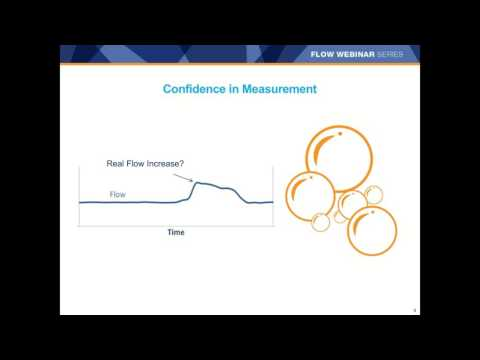

In [2]:
#@title Webinar: Advances in Multiphase Metering for Onshore Measurement in Oil & Gas
#@markdown This video gives an intriduction to Oil & Gas facilities Design
from IPython.display import YouTubeVideo
YouTubeVideo('mcxrjJwidl0', width=600, height=400)

# Calculation of PVT properties for a multiphase flow meter

A typical multi phase flow meter will need calclation of various thermodynamic and physical properties. SUch properties have to be updated s the field is produced. The input to the property calculations are a characterized fluid composition from PVT studies.

The following script demonstrates calculation of PVT properties for a multi phase flow meter using a CHaracterized fluid composition.

                          total         gas         oil                     
           nitrogen     9.72E-3     9.72E-3     9.72E-3      [mole fraction]
                CO2     6.32E-3     6.32E-3     6.32E-3      [mole fraction]
            methane   9.5111E-1   9.5111E-1   9.5111E-1      [mole fraction]
             ethane    2.553E-2    2.553E-2    2.553E-2      [mole fraction]
            propane     1.04E-3     1.04E-3     1.04E-3      [mole fraction]
           i-butane     1.21E-3     1.21E-3     1.21E-3      [mole fraction]
           n-butane      2.1E-4      2.1E-4      2.1E-4      [mole fraction]
          i-pentane      6.6E-4      6.6E-4      6.6E-4      [mole fraction]
          n-pentane        2E-4        2E-4        2E-4      [mole fraction]
              C6_PC      5.8E-4      5.8E-4      5.8E-4      [mole fraction]
              C7_PC     1.07E-3     1.07E-3     1.07E-3      [mole fraction]
              C8_PC      7.3E-4      7.3E-4      7.3E-4      [mole fraction]

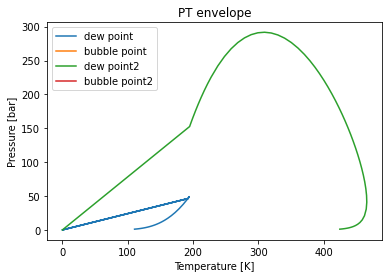

JavaObject id=o75

In [3]:
names = ['nitrogen','CO2', 'methane', 'ethane', 'propane','i-butane','n-butane','i-pentane','n-pentane']
molefractions = [0.972, 0.632, 95.111, 2.553, 0.104, 0.121, 0.021, 0.066, 0.02]
fluidDefinedComponents = createfluid2(names, molefractions, "mol/sec")

charNames = ["C6", "C7", "C8", "C9", "C10"]
charFlowrate = [0.058, 0.107, 0.073, 0.044, 0.118]
molarMass = [86.18/1000.0, 96.0/1000.0, 107.0/1000.0, 121.0/1000.0, 190.0/1000.0]
density = [664.0e-3, 738.0e-3, 765.0e-3, 781.0e-3, 813.30e-3]
characterizedFluid = addOilFractions(fluidDefinedComponents, charNames,charFlowrate,molarMass,  density);
characterizedFluid.setHeavyTBPfractionAsPlusFraction()
characterizedFluid.getCharacterization().getLumpingModel().setNumberOfPseudoComponents(12);
characterizedFluid.getCharacterization().setLumpingModel("PVTlumpingModel");
characterizedFluid.getCharacterization().characterisePlusFraction();
characterizedFluid.setMixingRule(2)
characterizedFluid.init(0)
characterizedFluid
printFrame(characterizedFluid)
characterizedFluid.setTemperature(273.15+20.6)
characterizedFluid.setPressure(86.8)
TPflash(characterizedFluid)
GORcalc = characterizedFluid.getPhase("gas").getNumberOfMolesInPhase()*8.314*288.15/101325  / (characterizedFluid.getPhase("oil").getVolume("m3"))
print("GOR test sep ", GORcalc)

characterizedFluid.setTemperature(273.15+15.0)
characterizedFluid.setPressure(1.01325)
TPflash(characterizedFluid)
GORcalcstd = characterizedFluid.getPhase("gas").getNumberOfMolesInPhase()*8.314*288.15/101325  / (characterizedFluid.getPhase("oil").getVolume("m3"))
print("GOR standard ", GORcalcstd)

print('phase envelope for characterized fluid')
phaseenvelope(characterizedFluid, True)

## Generation of properties for multiphase measurements

The following script demonstrates how to generate typical properties for a multiphase flow meter.

In [4]:
import numpy
import numpy as np

pressures = [150.0, 170.0, 180.0, 200.0, 270.0, 320.0, 400.0]
temperatures = [30.0, 40.0, 50.0, 60.0, 80.0]

numP = len(pressures)
numT = len(temperatures)

gasViscosity = numpy.zeros((numP, numT))
oilViscosity = numpy.zeros((numP, numT))
gasDensity = numpy.zeros((numP, numT))
oilDensity = numpy.zeros((numP, numT))
GORcalc  = numpy.zeros((numP, numT))
GORactual = numpy.zeros((numP, numT))
gasViscosity[:] = np.NaN
oilViscosity[:] = np.NaN
gasDensity[:] = np.NaN
oilDensity[:] = np.NaN
GORcalc[:] = np.NaN
GORactual[:] = np.NaN

for i in range(len(temperatures)):
  for j in range(len(pressures)):
    characterizedFluid.setPressure(pressures[j])
    characterizedFluid.setTemperature(temperatures[i]+273.15)
    TPflash(characterizedFluid)
    characterizedFluid.initProperties()
    if(characterizedFluid.hasPhaseType("gas")):
      gasViscosity[j][i]=characterizedFluid.getPhase("gas").getViscosity("cP")
      gasDensity[j][i]=characterizedFluid.getPhase("gas").getDensity("kg/m3")
    if(characterizedFluid.hasPhaseType("oil")):
      oilViscosity[j][i]=characterizedFluid.getPhase("oil").getViscosity("cP")
      oilDensity[j][i]=characterizedFluid.getPhase("oil").getDensity("kg/m3")
    if(characterizedFluid.hasPhaseType("gas") and characterizedFluid.hasPhaseType("oil")):
      GORcalc[j][i] = characterizedFluid.getPhase("gas").getNumberOfMolesInPhase()*8.314*288.15/101325  / (characterizedFluid.getPhase("oil").getVolume("m3"))
      GORactual[j][i] =   (characterizedFluid.getPhase("gas").getVolume("m3"))/ (characterizedFluid.getPhase("oil").getVolume("m3"))

gasDensityDataFrame = pd.DataFrame(gasDensity,index=pressures, columns=temperatures)
oilDensityDataFrame = pd.DataFrame(oilDensity,index=pressures, columns=temperatures)
gasviscosityDataFrame = pd.DataFrame(gasViscosity,index=pressures, columns=temperatures)
oilviscosityDataFrame = pd.DataFrame(oilViscosity,index=pressures, columns=temperatures)
GORcalcFrame = pd.DataFrame(GORcalc,index=pressures, columns=temperatures)
GORactualFrame = pd.DataFrame(GORactual,index=pressures, columns=temperatures)

print("gas density")
print(gasDensityDataFrame.tail())
print("oil density")
print(oilDensityDataFrame.head())
print("gas viscosity")
print(gasviscosityDataFrame.tail())
print("oil viscosity")
print(oilviscosityDataFrame.head())
print("GOR actual")
print(GORactualFrame.head())

gas density
             30.0        40.0        50.0        60.0        80.0
180.0  146.445491  138.058831  130.737950  124.292650  113.453140
200.0  161.468382  152.395434  144.407432  137.332091  125.364596
270.0  205.462582  195.159408  185.959171  177.590978  163.034140
320.0  229.456551  219.358451  209.992253  201.324701  185.908778
400.0  259.961066  250.271954  241.117316  232.491442  216.762913
oil density
             30.0        40.0        50.0        60.0        80.0
150.0  692.688922  697.260787  701.806444  706.296674  715.097039
170.0  691.194163  695.792136  700.453013  705.135873  714.601294
180.0  691.455417  695.986159  700.646104  705.389573  715.156085
200.0  694.133550  698.375267  702.927653  707.719005  717.851512
270.0         NaN  721.372340  723.051714  724.844778  727.881798
gas viscosity
           30.0      40.0      50.0      60.0      80.0
180.0  0.018341  0.018079  0.017911  0.017814  0.017770
200.0  0.019507  0.019137  0.018876  0.018699  0.018528
27

# Test the fluid characterisation by comparing to PVT data
The bubble point pressure is determined by an experiment called Constant Composition Expansion (CCE). It's also called Constant Mass Expansion (CME) experiment or Pressure-Volume (PV) relationship. ... The cell pressure is controlled by a positive displacement pump and recorded on an accurate pressure gauge.

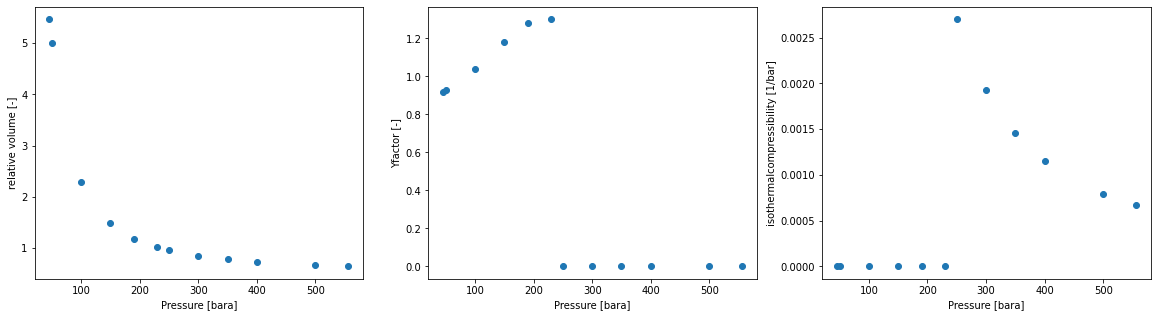

YfactorFrame
       relativevolume   Yfactor      Zgas  isothermalcompressibility  liquidrelativevolume
555.3        0.643915  0.000000  1.287137                   0.000667              0.000000
500.0        0.670307  0.000000  1.206457                   0.000792              0.000000
400.0        0.737447  0.000000  1.061840                   0.001156              0.000000
350.0        0.786904  0.000000  0.991421                   0.001461              0.000000
300.0        0.855717  0.000000  0.924102                   0.001928              0.000000
250.0        0.959056  0.000000  0.863082                   0.002701              0.000000
230.0        1.017944  1.300473  0.000000                   0.000000              0.105808
190.0        1.186055  1.283352  0.000000                   0.000000              0.276375
150.0        1.482111  1.180463  0.000000                   0.000000              0.503791
100.0        2.300468  1.040911  0.000000                   0.000000         

In [7]:

pressure = [555.3, 500.0, 400.0, 350.0, 300.0, 250.0, 230.0, 190.0, 150.0, 100.0, 50.0, 46.1]
temperature = [273.15+73.0, 273.15+73.0, 273.15+73.0, 273.15+73.0, 273.15+73.0, 273.15+73.0, 273.15+73.0, 273.15+73.0, 273.15+73.0, 273.15+73.0, 273.15+73.0, 273.15+73.0]

relativevolume = []
liquidrelativevolume = []
Zgas =  []
Yfactor = []
isothermalcompressibility = []

CME(characterizedFluid,pressure,temperature,relativevolume, liquidrelativevolume,Zgas,Yfactor,isothermalcompressibility)

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(pressure, relativevolume, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('relative volume [-]')
plt.subplot(132)
plt.plot(pressure, Yfactor, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('Yfactor [-]')
plt.subplot(133)
plt.plot(pressure, isothermalcompressibility, "o")
plt.xlabel('Pressure [bara]')
plt.ylabel('isothermalcompressibility [1/bar]')
plt.show()

Yfactorarray= np.asarray([relativevolume,Yfactor,Zgas, isothermalcompressibility,liquidrelativevolume])
pressurearray= np.asarray(pressure)
temperaturearray= np.asarray(temperature)
YfactorFrame = pd.DataFrame(Yfactorarray.transpose(),index=pressurearray, columns=["relativevolume", "Yfactor", "Zgas", "isothermalcompressibility", "liquidrelativevolume"])
print("YfactorFrame")
print(YfactorFrame.head(20).to_string())
print()

In [6]:
relativevolume

[0.8731686674179754,
 0.9089561946190386,
 1.0000000110227627,
 1.067065246637665,
 1.1603785239066988,
 1.300508383791278,
 1.3803621623207483,
 1.608326385528078,
 2.0097869296765674,
 3.1195034412230545,
 6.780029467216676,
 7.410113283847673]